In [1]:
from PIL import Image, ImageDraw
import json

In [2]:
dataset = json.load(open("dataset/dataset.json","r"))

In [25]:
imgpath = "dataset/"+dataset[0]['file']
objects = dataset[0]['objects']

In [43]:
def convert_coords(coords, original_size=(2041, 1024), target_size=(1024, 1024)):
    orig_w, orig_h = original_size
    target_w, target_h = target_size
    
    x1 = coords['x1'] * orig_w / 1000
    y1 = coords['y1'] * orig_h / 1000
    x2 = coords['x2'] * orig_w / 1000
    y2 = coords['y2'] * orig_h / 1000
    wd = coords['wd'] * orig_w / 1000
    ht = coords['ht'] * orig_h / 1000
    
    if orig_w > orig_h:
        padded_size = orig_w
        padding_w = 0
        padding_h = (padded_size - orig_h) / 2
    elif orig_h > orig_w:
        padded_size = orig_h
        padding_w = (padded_size - orig_w) / 2
        padding_h = 0
    else:
        padded_size = orig_w
        padding_w = 0
        padding_h = 0
    
    scale = target_w / padded_size
    
    x1_new = (x1 + padding_w) * scale
    y1_new = (y1 + padding_h) * scale
    x2_new = (x2 + padding_w) * scale
    y2_new = (y2 + padding_h) * scale
    wd_new = wd * scale
    ht_new = ht * scale
    
    return {
        'x1': int(round(x1_new)),
        'y1': int(round(y1_new)),
        'x2': int(round(x2_new)),
        'y2': int(round(y2_new)),
        'wd': int(round(wd_new)),
        'ht': int(round(ht_new)),
        **{k: coords[k] for k in coords if k not in ['x1', 'y1', 'x2', 'y2', 'wd', 'ht']}
    }

def pad_and_resize_image(image_path, target_size=(1024, 1024), padding_color=(0, 0, 0)):
    if isinstance(image_path, str):
        img = Image.open(image_path)
    else:
        img = image_path.copy()
    
    w, h = img.size
    max_dim = max(w, h)
    
    square = Image.new(img.mode, (max_dim, max_dim), padding_color)
    
    paste_x = (max_dim - w) // 2
    paste_y = (max_dim - h) // 2
    square.paste(img, (paste_x, paste_y))
    
    resized = square.resize(target_size, Image.LANCZOS)
    
    return resized

def draw_bounding_boxes(image, boxes, colors=None, line_width=3):
    default_palette = [
        'red', 'blue', 'green', 'yellow', 'orange', 'purple', 
        'cyan', 'magenta', 'lime', 'pink', 'brown', 'teal',
        'navy', 'maroon', 'olive', 'coral', 'gold', 'indigo',
        'violet', 'salmon', 'khaki', 'lavender', 'forestgreen',
        'rosybrown', 'dodgerblue', 'mediumpurple', 'darkorange',
        'seagreen', 'crimson', 'slateblue', 'tan'
    ]
    
    if colors is None:
        colors = default_palette
    elif isinstance(colors, str) or (isinstance(colors, tuple) and len(colors) == 3):
        colors = [colors]
    
    if isinstance(image, str):
        image = Image.open(image)
    else:
        image = image.copy()
    
    draw = ImageDraw.Draw(image)
    
    for i, box in enumerate(boxes):
        box_color = colors[i % len(colors)]
        
        draw.rectangle(
            [(box['x1'], box['y1']), (box['x2'], box['y2'])], 
            outline=box_color, 
            width=line_width
        )
    
    return image

#### Run this to convert dataset to known coords

```python
for data in dataset:
    if len(data['objects']) > 1:
        objects = data['objects']
        coordinates = [convert_coords(obj) for obj in objects]
        data['objects'] = coordinates
        file = data['file']
```

In [75]:
with open("dataset.json","w") as f:
    json.dump(dataset,f,indent=2)

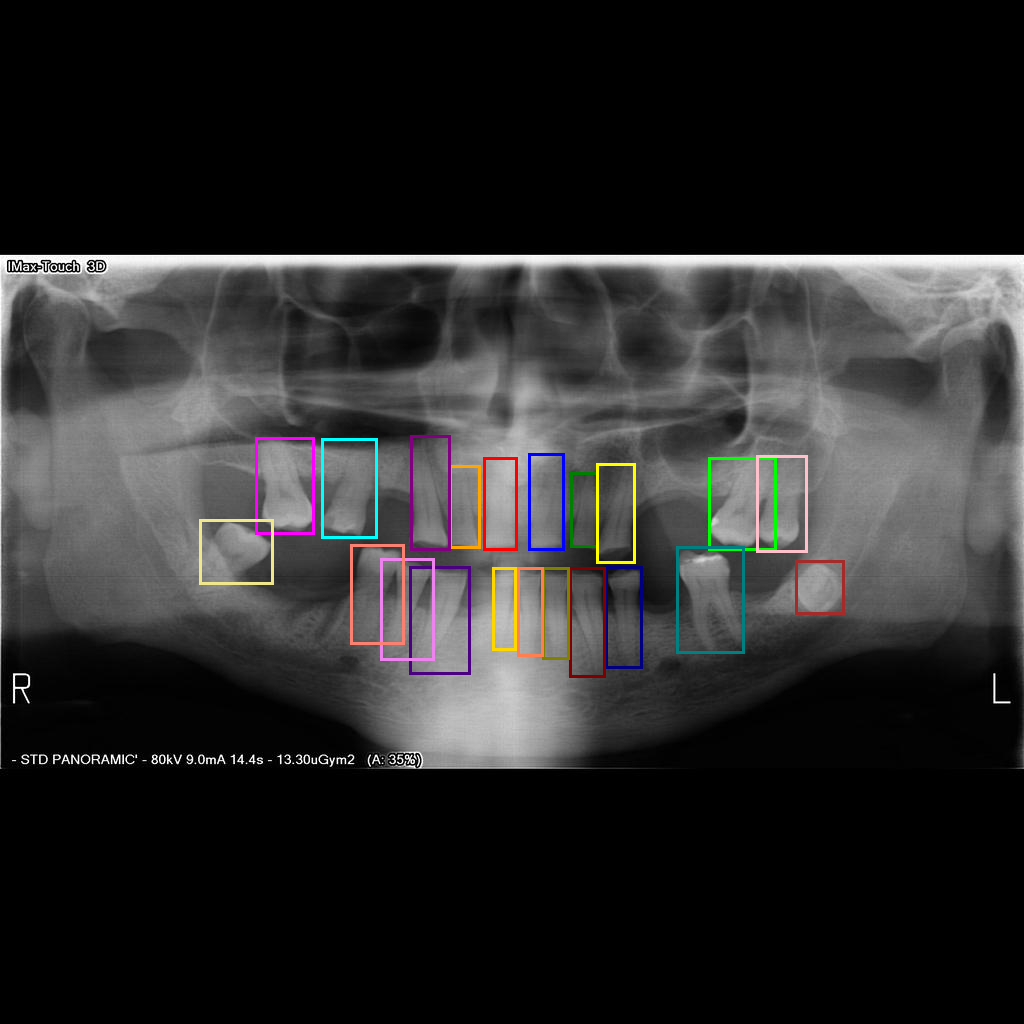

In [74]:
draw_bounding_boxes(Image.open("dataset/panoramic_img15.jpg"),dataset[0]['objects'])